## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [5]:
import pandas as pd
file_path = 'D:\GIT1\Homework\src\data\github_bot_processed_data.csv'
data = pd.read_csv(file_path)
pd.set_option('display.max_rows', 50)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  


print("数据的前几行：")
print(data.head())

print("\n数据结构信息：")
print(data.info())

print("\n数据的描述性统计信息：")
print(data.describe(include='all'))


数据的前几行：
   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    Bot  True       False    False  False      True    

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\86139\AppData\Local\Temp\ipykernel_47196\2579553430.py:2: SyntaxWarning: invalid escape sequence '\G'
  file_path = 'D:\GIT1\Homework\src\data\github_bot_processed_data.csv'


In [6]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
data['followers_currency'] = data['followers'].apply(lambda x: f"${x:,.2f}")  
data['following_percentage'] = data['following'].apply(lambda x: f"{x / 100:.2%}")  

formatted_data = data[['created_at', 'updated_at', 'followers', 'followers_currency', 'following', 'following_percentage']]
print(formatted_data.head())


                 created_at                updated_at  followers followers_currency  following following_percentage
0 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00          5              $5.00          1                1.00%
1 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00          9              $9.00          6                6.00%
2 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00       1212          $1,212.00        221              221.00%
3 2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00         84             $84.00          2                2.00%
4 2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00          6              $6.00          2                2.00%


In [7]:
import numpy as np

# 对选定列进行对数变换
cols_to_transform = ['public_repos', 'public_gists', 'followers', 'following']

# 添加新列以存储对数变换的结果
for col in cols_to_transform:
    data[f'log_{col}'] = data[col].apply(lambda x: np.log1p(x))  # 使用 np.log1p(x) 处理 x=0 的情况

# 查看原始值和对数变换值的对比（前 5 行）
log_transformed_data = data[[col for col in cols_to_transform] + [f'log_{col}' for col in cols_to_transform]]
print(log_transformed_data.head())


   public_repos  public_gists  followers  following  log_public_repos  log_public_gists  log_followers  log_following
0            26             1          5          1          3.295837          0.693147       1.791759       0.693147
1            30             3          9          6          3.433987          1.386294       2.302585       1.945910
2           103            49       1212        221          4.644391          3.912023       7.100852       5.402677
3            49             0         84          2          3.912023          0.000000       4.442651       1.098612
4            11             1          6          2          2.484907          0.693147       1.945910       1.098612


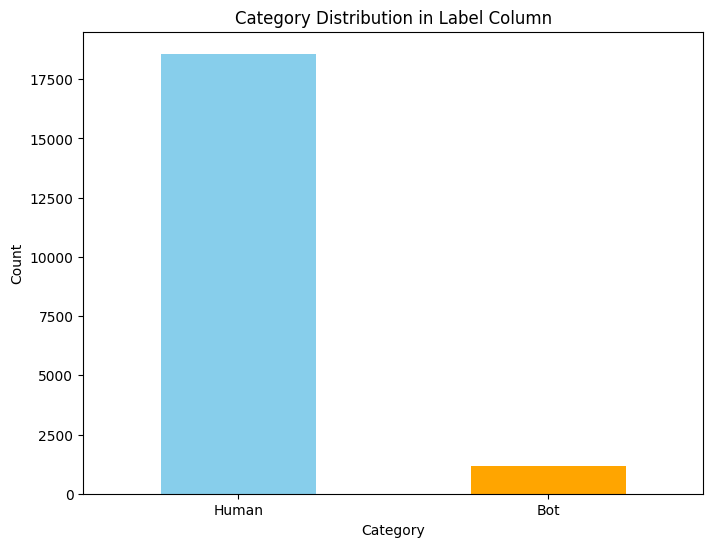

C:\Users\86139\AppData\Local\Temp\ipykernel_47196\1906473922.py:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  bool_distribution = data[bool_cols].apply(pd.value_counts).T


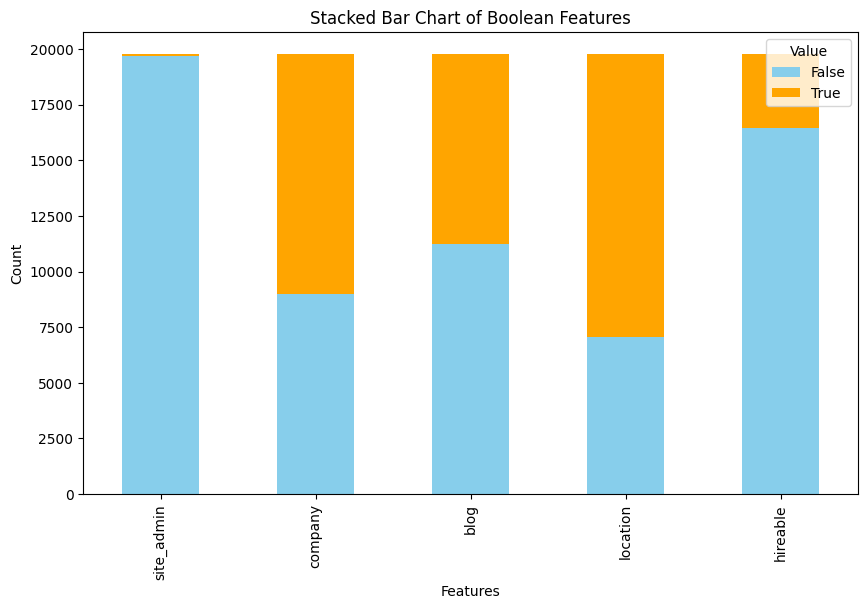

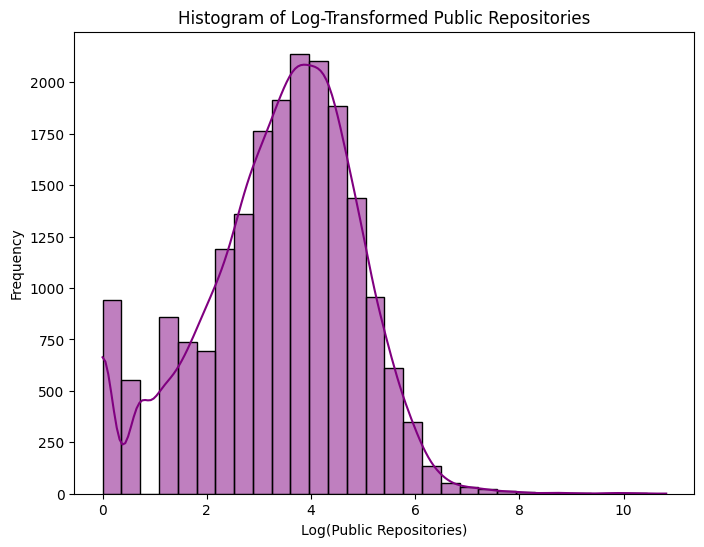

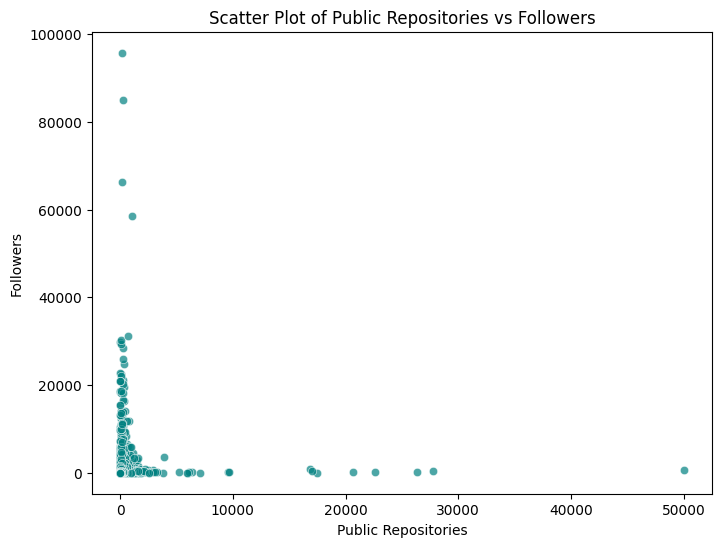

c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

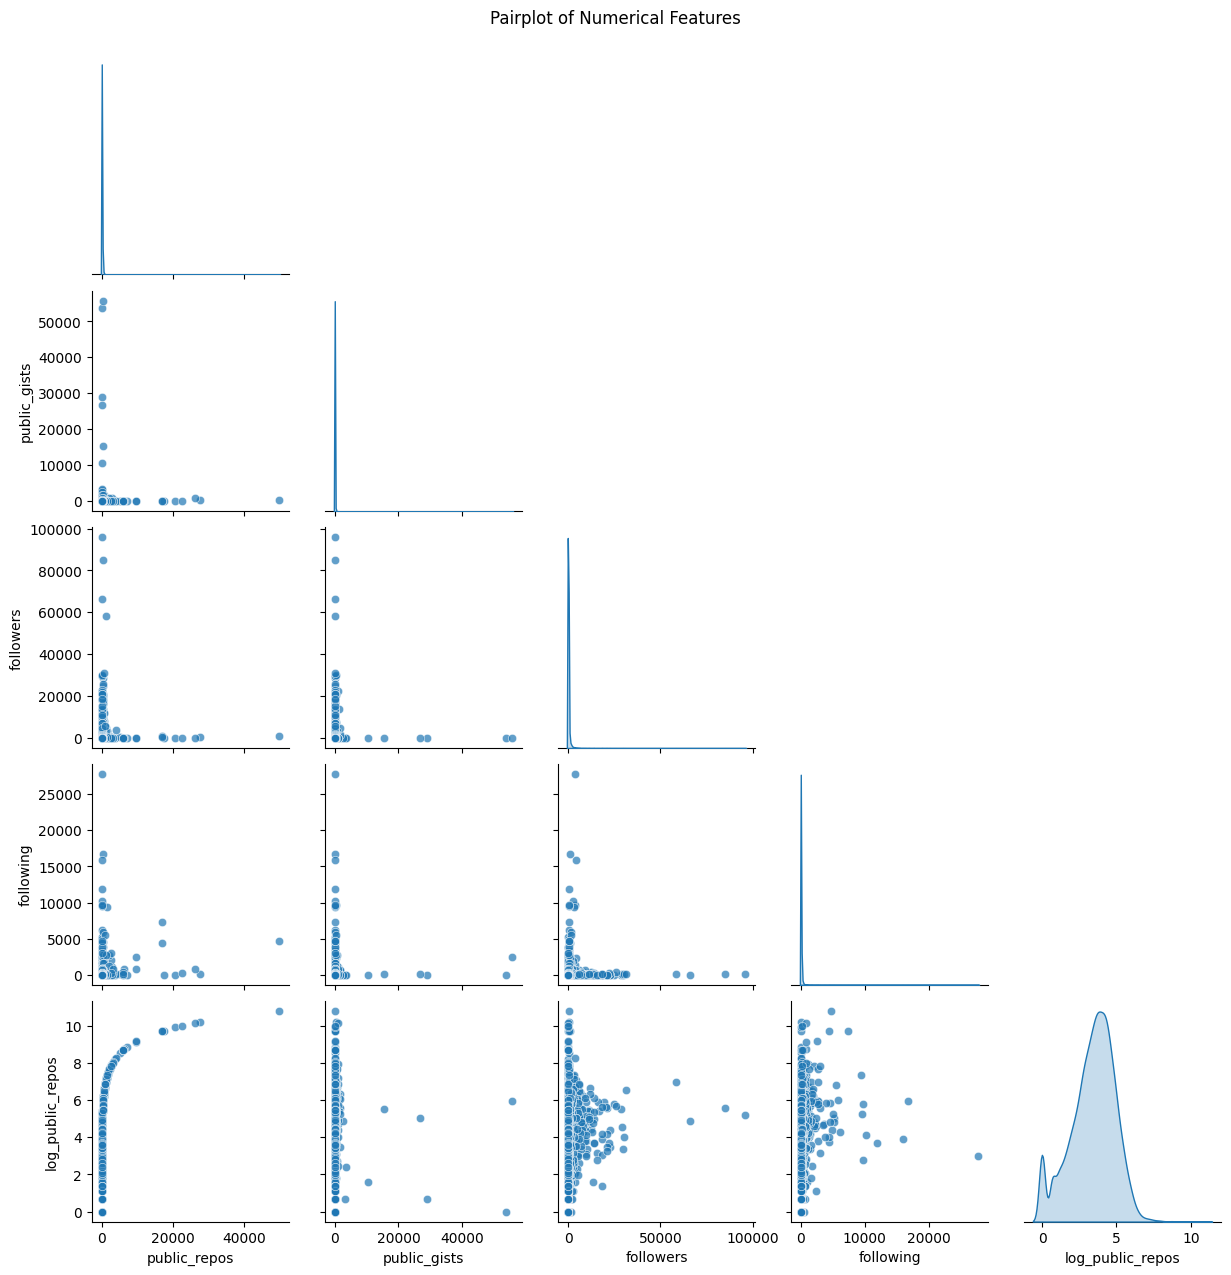

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data['log_public_repos'] = data['public_repos'].fillna(0).apply(lambda x: np.log1p(x))

plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Category Distribution in Label Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


bool_cols = ['site_admin', 'company', 'blog', 'location', 'hireable']
bool_distribution = data[bool_cols].apply(pd.value_counts).T

bool_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Stacked Bar Chart of Boolean Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend(title='Value', loc='upper right')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(data['log_public_repos'], bins=30, kde=True, color='purple')
plt.title('Histogram of Log-Transformed Public Repositories')
plt.xlabel('Log(Public Repositories)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='public_repos', y='followers', data=data, alpha=0.7, color='teal')
plt.title('Scatter Plot of Public Repositories vs Followers')
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.show()


num_cols = ['public_repos', 'public_gists', 'followers', 'following', 'log_public_repos']
sns.pairplot(data[num_cols], diag_kind='kde', corner=True, palette='husl', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


C:\Users\86139\AppData\Local\Temp\ipykernel_47196\3450835147.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='log_followers', data=data, palette='Set2')


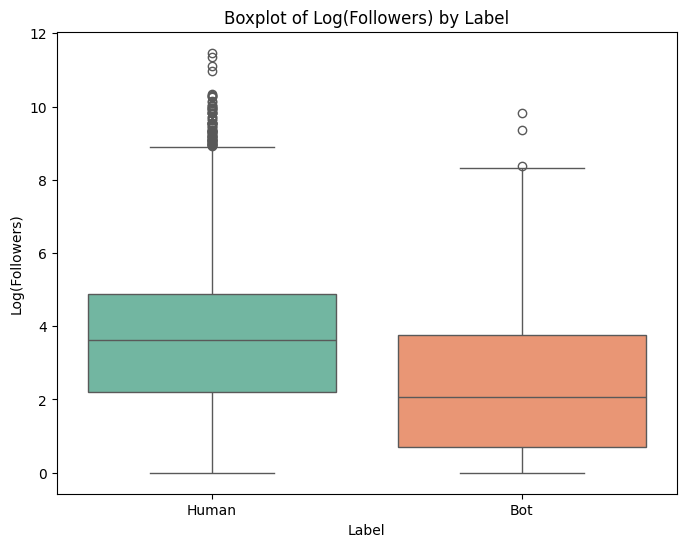

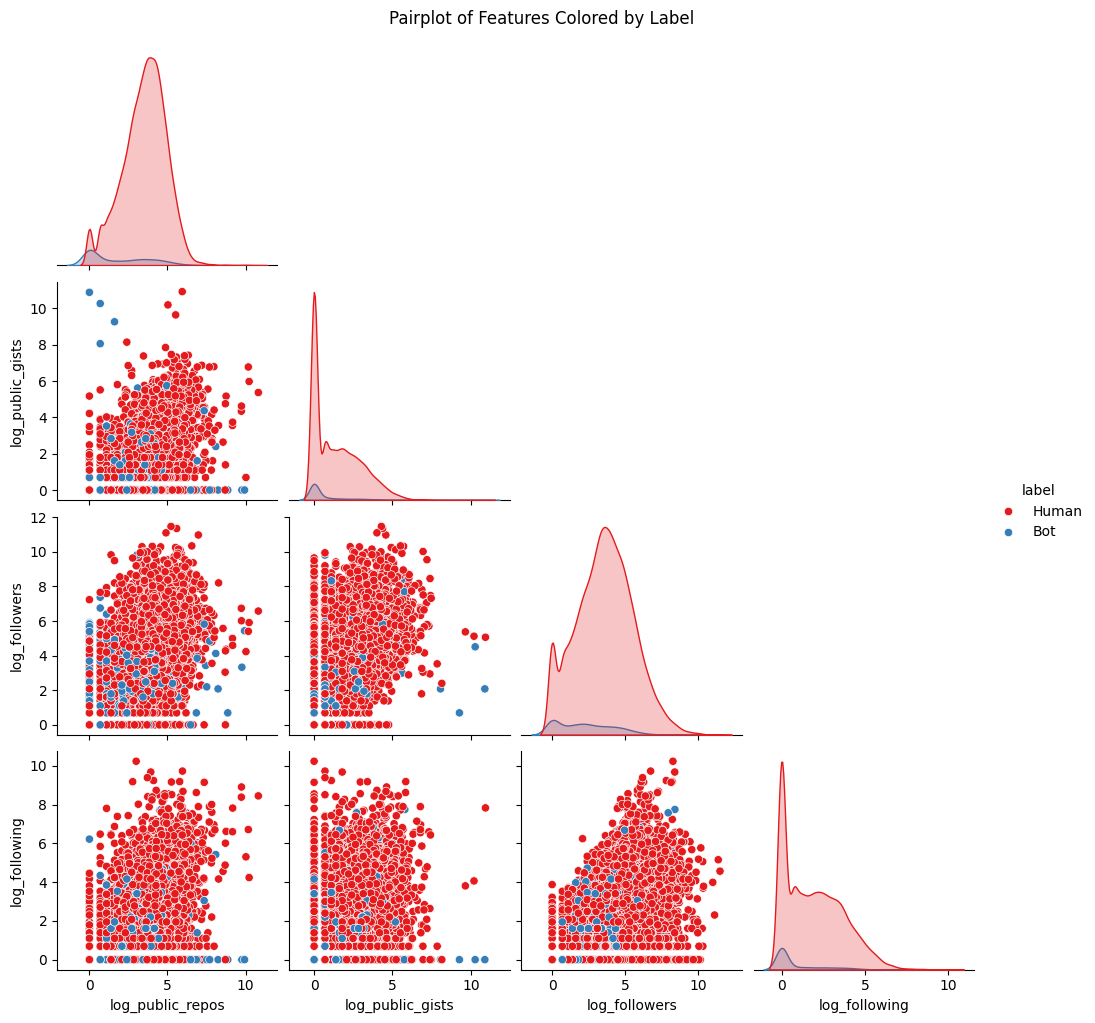

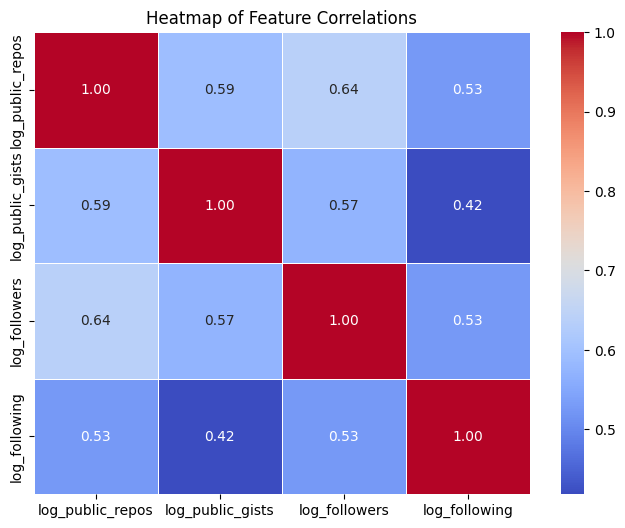

C:\Users\86139\AppData\Local\Temp\ipykernel_47196\3450835147.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='log_followers', data=data, palette='Pastel1', split=True)


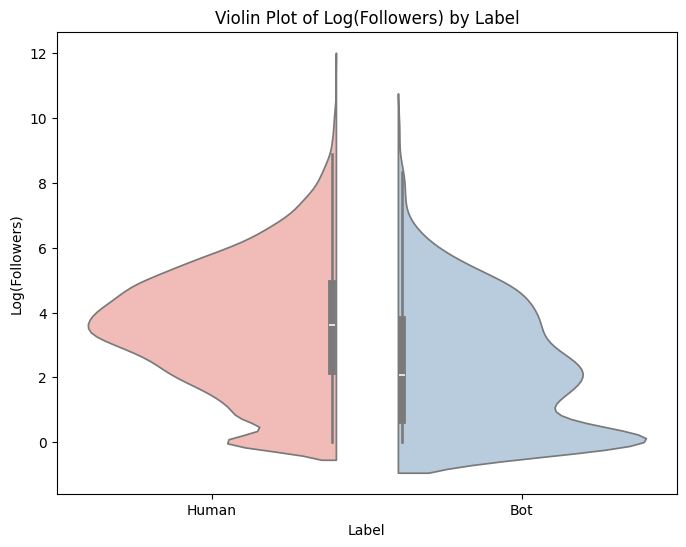

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data['log_followers'] = data['followers'].fillna(0).apply(lambda x: np.log1p(x))
data['log_public_gists'] = data['public_gists'].fillna(0).apply(lambda x: np.log1p(x))
data['log_following'] = data['following'].fillna(0).apply(lambda x: np.log1p(x))

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=data, palette='Set2')
plt.title('Boxplot of Log(Followers) by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()

pairplot_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following', 'label']
sns.pairplot(data[pairplot_features], hue='label', diag_kind='kde', palette='Set1', corner=True)
plt.suptitle('Pairplot of Features Colored by Label', y=1.02)
plt.show()

correlation_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
correlation_matrix = data[correlation_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='log_followers', data=data, palette='Pastel1', split=True)
plt.title('Violin Plot of Log(Followers) by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()


In [16]:
import pandas as pd
from ydata_profiling import ProfileReport


# 读取您的数据文件（替换为实际文件路径）
data = pd.read_csv("D:\GIT1\Homework\src\data\github_bot_processed_data.csv")

# 生成交互式分析报告
profile = ProfileReport(data, title="Interactive Data Analysis Report", explorative=True)

# 保存报告为 HTML 文件
profile.to_file("github_data_analysis_report.html")

print("报告已生成并保存为 'github_data_analysis_report.html'")


<>:6: SyntaxWarning: invalid escape sequence '\G'
<>:6: SyntaxWarning: invalid escape sequence '\G'
C:\Users\86139\AppData\Local\Temp\ipykernel_47196\2654834746.py:6: SyntaxWarning: invalid escape sequence '\G'
  data = pd.read_csv("D:\GIT1\Homework\src\data\github_bot_processed_data.csv")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

报告已生成并保存为 'github_data_analysis_report.html'
